# Predicting Liver Cirrhosis Stage


# Phase 1: Data Preparation & Visualisation



# Table of Contents

* [Introduction](#Introduction)

    + [Dataset Source](#Dataset-Source)
    + [Dataset Details](#Dataset-Details)
    + [Dataset Features](#Dataset-Features)
    + [Target Feature](#Target-Feature)
    
* [Goals and Objectives](#Goals-and-Objectives)
* [Data Cleaning and Preprocessing](#Data-Cleaning-and-Preprocessing)
* [Data Exploration and Visualisation](#Data-Exploration-and-Visualisation)
* [Literature Review](#Literature-Review)
* [Summary and Conclusion](#Summary-and-Conclusion)
* [References](#References) 


# Introduction
### Dataset Source



The Cirrhosis Prediction Dataset for this project is taken from `Kaggle`. The dataset contains different types of  information about patients madical history, lab test reports and the stage of Liver Cirrhosis.

### Dataset Details

Cirrhosis is a condition in which the liver becomes infected due to various liver diseases and conditions, including hepatitis and chronic alcoholism. The information in the dataset is collected from the `Mayo Clinic trial in primary biliary cirrhosis (PBC)` and the study was conducted in between 1974 and 1984. You can find the full description of the clinical trial and all the records in Chapter 0 of the book "CountingProcesses and Survival Analysis, Wiley, 1991" by Fleming and Harrington. 

During the ten-year interval of Mayo Clinic Trail, a total of 424 patients. The dataset contains the information about patient ID, Number of days, Status of the patient, Type of drug, Age, Sex, Ascites, Hepatomegaly, Spiders, Edema, Bilirubin, Cholesterol, Albumin, Copper, Alk_Phos(alkaline phosphatase), SGOT, Triglycerides, Platelets, Prothrombin and Stage. By using these data features, we will do predictive modelling. 

The dataset has 19 features, one target variable and 418 observations. 



**Dataset Retrieval**

* Loading the `modules` that we need during the project.
* We already downloaded the dataset in our local system and now read the data by using modules.

In [2]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd 
import numpy as np
import io
import requests
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
plt.style.use("seaborn")

In [3]:
data = pd.read_csv("Phase1_Group98.csv")

In [4]:
data.sample(10, random_state=999)

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
317,318,1680,C,NaN,15706,F,NaN,NaN,NaN,N,0.7,NaN,3.68,NaN,NaN,NaN,NaN,306.0,9.5,2.0
344,345,3021,CL,NaN,17532,F,NaN,NaN,NaN,N,0.5,NaN,3.76,NaN,NaN,NaN,NaN,388.0,10.1,2.0
221,222,597,D,Placebo,16898,F,N,Y,N,N,4.5,372.0,3.38,227.0,2310.0,167.40,135.0,240.0,12.4,3.0
287,288,1067,CL,Placebo,17874,F,N,Y,N,S,8.7,310.0,3.89,107.0,637.0,117.00,242.0,298.0,9.6,2.0
219,220,1235,D,D-penicillamine,23241,F,N,N,Y,N,3.8,426.0,3.22,96.0,2716.0,210.80,113.0,228.0,10.6,2.0
159,160,2772,C,Placebo,20955,F,N,N,N,N,0.6,217.0,3.62,13.0,414.0,75.95,119.0,224.0,10.5,3.0
100,101,3581,C,Placebo,16418,F,N,N,N,N,0.9,400.0,3.60,31.0,1689.0,164.30,166.0,327.0,10.4,3.0
245,246,1435,CL,D-penicillamine,12035,F,N,Y,N,N,2.1,387.0,3.77,63.0,1613.0,150.35,33.0,185.0,10.1,4.0
164,165,1077,D,D-penicillamine,19470,M,N,Y,N,N,4.0,196.0,3.45,80.0,2496.0,133.30,142.0,212.0,11.3,4.0
86,87,198,D,D-penicillamine,13616,F,N,N,N,N,1.1,345.0,4.40,75.0,1860.0,218.55,72.0,447.0,10.7,3.0


### Dataset Features

The descriptive features below: 
 
* **`ID`**: Unique Identifier.
* **`N_Days`**: number of days between registration and the earlier of death, transplantation, or study analysis time in July 1986.
* **`Status`**: Status of the patient C (censored), CL (censored due to liver tx), or D (death).
* **`Drug`**: Type of drug D-penicillamine or placebo.
* **`Age`**: age in [days].
* **`Sex`**: M (male) or F (female).
* **`Ascites`**: Presence of Ascites N (No) or Y (Yes).
* **`Hepatomegaly`**: Presence of Hepatomegaly N (No) or Y (Yes).
* **`Spiders`**: Presence of Spiders N (No) or Y (Yes).
* **`Edema`**: 10) Edema: presence of edema N (no edema and no diuretic therapy for edema), S (edema present without diuretics, or edema resolved by diuretics), or Y (edema despite diuretic therapy).

* **`Bilirubin`**: Serum Bilirubin in [mg/dl].
* **`Cholesterol`**: Serum Cholesterol in [mg/dl].
* **`Albumin`**: Albumin in [gm/dl].
* **`Copper`**: Urine Copper in [ug/day].
* **`Alk_Phos`**: Alkaline Phosphatase in [U/liter].
* **`SGOT`**: SGOT in [U/ml].
* **`Triglycerides`**: Triglicerides in [mg/dl].
* **`Platelets`**: Platelets per cubic [ml/1000].
* **`Prothrombin`**: prothrombin time in seconds [s].

* The below table contains the information of `Feature Name`, `Data type of Feature`, `Units` and `Description`

In [5]:
from tabulate import tabulate

table = [['Name','Data Type','Units','Description'],
         ['ID','Numeric','NA','Unique ID of patient'],
         ['N_Days','Numeric','NA','number of days between\
         \rregistration and the earlier of death, transplantation.'],
         ['Status','Ordinal categorical','NA','C (censored), CL (censored due to liver tx), D (death)'],
         ['Drug','Nominal categorical','NA','Type of drug (D-penicillamine, Placebo).'],
         ['Age','Numeric','NA','Age of patient(in Days)'],
         ['Sex','Nominal categorical','NA','M (male), F (female)'],
         ['Ascites','Nominal categorical','NA','Presence of Ascites(Yes, No)'],
         ['Hepatomegaly','Nominal categorical','NA','Presence of Hepatomegaly(Yes,No)'],
         ['Spiders','Nominal categorical','NA','Presence of Spiders(Yes,No)'],
         ['Edema','Nominal categorical','NA','Presence of Edema(N, S, Y)'],
         ['Bilirubin','Numeric','mg/dl','Amount of Serum Bilirubin'],
         ['Cholesterol','Numeric','mg/dl','Serum Cholesterol'],
         ['Albumin','Numeric','gm/dl','Albumin in [gm/dl]'],
         ['Copper','Numeric','ug/day','Urine Copper in a day'],
         ['Alk_Phos','Numeric','U/liter','Alkaline Phosphatase in liter'],
         ['SGOT','Numeric','U/ml','SGOT in ml'],
         ['Triglycerides','Numeric','mg/dl','Triglicerides in dl'],
        ['Platelets','Numeric','ml/1000','Platelets per cubic'],
        ['Prothrombin','Numeric','SI','prothrombin time in seconds']]

print(tabulate(table, headers='firstrow', tablefmt='fancy_grid'))

╒═══════════════╤═════════════════════╤═════════╤═════════════════════════════════════════════════════════╕
│ Name          │ Data Type           │ Units   │ Description                                             │
╞═══════════════╪═════════════════════╪═════════╪═════════════════════════════════════════════════════════╡
│ ID            │ Numeric             │ NA      │ Unique ID of patient                                    │
├───────────────┼─────────────────────┼─────────┼─────────────────────────────────────────────────────────┤
│ N_Days        │ Numeric             │ NA      │ number of days between                                  │
│               │                     │         │ registration and the earlier of death, transplantation. │
├───────────────┼─────────────────────┼─────────┼─────────────────────────────────────────────────────────┤
│ Status        │ Ordinal categorical │ NA      │ C (censored), CL (censored due to liver tx), D (death)  │
├───────────────┼───────────

### Target Feature

The `target feature` for this project is `Stage` variable. Target has four stages 1,2,3 and 4 which describe the  histologic stage of disease. The Stage for disease is predicted by the help of other features.

# Goals and Objectives


Cirrhosis is a liver damage type in which healthy cells are replaced by scar tissue, this type of problems happen due to many things such as  hepatitis and chronic alcoholism. Liver Cirrhosis is a big problem that causes damage to liver tissues and leads to liver failure and many other problems. There are four stages of liver cirrhosis. The `main goal` of this machine learning project is to `predict the stage of Cirrhosis` of a patient by the help of medical history, personal information like age, sex and other lab tests that can be helpful for `doctors` to make more `accurate decisions` about their treatment options and more `customized patient care`. Moreover, with the help of machine learning algorithms we can be able to  identifying individuals who are more likely to develop liver cirrhosis.

The objective of this Machine Learning Project : 

Doing data pre-processing by using different tools and techniques to cleaning the data for the machine learning model and after that find the relationships between different features and gain insights. Also, some exploratory data analysis by using basic statistics and drawing plots to gain some insight into the patterns. Moreover, Identifying the most appropriate features in the dataset that are helpful for our prediction and removing some irrelevant features from the dataset that are not a good predictor.We can use feature engineering for identifying the features. The main objective of the project is to predict the Cirrhosis liver stage of a patient.



# Data Cleaning and Preprocessing

In this section, we go over the data preprocessing and cleansing procedures 

## Data Cleaning Steps
- Drop irrelevant features form our dataset
- Check Missing Values
- Handling Missing Values
 - For Numeric type we are using Median
 
 - For Categorical type we will replace with Mode
 
- Converting Age in days to Age in Year
- Check the Unique values of Nominal Data

Creating a `copy` of orignial dataframe

In [6]:
mask_df = data.copy()

Displaying all the `column names` 

In [7]:
mask_df.columns

Index(['ID', 'N_Days', 'Status', 'Drug', 'Age', 'Sex', 'Ascites',
       'Hepatomegaly', 'Spiders', 'Edema', 'Bilirubin', 'Cholesterol',
       'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets',
       'Prothrombin', 'Stage'],
      dtype='object')

In [8]:
#Checking all the information about DataFrame
mask_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             418 non-null    int64  
 1   N_Days         418 non-null    int64  
 2   Status         418 non-null    object 
 3   Drug           312 non-null    object 
 4   Age            418 non-null    int64  
 5   Sex            418 non-null    object 
 6   Ascites        312 non-null    object 
 7   Hepatomegaly   312 non-null    object 
 8   Spiders        312 non-null    object 
 9   Edema          418 non-null    object 
 10  Bilirubin      418 non-null    float64
 11  Cholesterol    284 non-null    float64
 12  Albumin        418 non-null    float64
 13  Copper         310 non-null    float64
 14  Alk_Phos       312 non-null    float64
 15  SGOT           312 non-null    float64
 16  Tryglicerides  282 non-null    float64
 17  Platelets      407 non-null    float64
 18  Prothrombi

Checking the `Data Type` of each column and Identifying that it is same as data 

In [9]:
#Check dtype for columns
mask_df.dtypes

ID                 int64
N_Days             int64
Status            object
Drug              object
Age                int64
Sex               object
Ascites           object
Hepatomegaly      object
Spiders           object
Edema             object
Bilirubin        float64
Cholesterol      float64
Albumin          float64
Copper           float64
Alk_Phos         float64
SGOT             float64
Tryglicerides    float64
Platelets        float64
Prothrombin      float64
Stage            float64
dtype: object

Checking the `Shape` of DataFrame

In [10]:
mask_df.shape     

(418, 20)

The `ID` Column contains a unique identifier for each row of data. This information is `district`, it does not provide any helpful insight.
So This `ID` column is `removed`

In [11]:
#droping the ID columns
mask_df = mask_df.drop('ID', axis=1) 

Checking the missing values in each columns and find that `Drug`,`Ascites`, `Hepatomegaly`,`Spiders`, `Cholesterol`, `Copper`, `Alk_Phos`, `SGOT`, `Tryglicerides`, `Platelets`, `Prothrombin`, `Stage` these Columns has missing values.

Usually, for many cases if the dataset is big and missing values is less so we will drop the missing values. But in this case dataset is small and we cann't affort to drop the missing values.

In [12]:
#Checking the missing values 
mask_df.isna().sum()   

N_Days             0
Status             0
Drug             106
Age                0
Sex                0
Ascites          106
Hepatomegaly     106
Spiders          106
Edema              0
Bilirubin          0
Cholesterol      134
Albumin            0
Copper           108
Alk_Phos         106
SGOT             106
Tryglicerides    136
Platelets         11
Prothrombin        2
Stage              6
dtype: int64

Creating a list of `categorical` feature's name list

In [13]:
#Making a list of object type column name list
cat_cols = list(mask_df.columns[mask_df.dtypes == np.object])
cat_cols

['Status', 'Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema']

In [14]:
#Making a list of float type column name list
flot_cols = list(mask_df.columns[mask_df.dtypes == np.float64 ])
list(flot_cols)

['Bilirubin',
 'Cholesterol',
 'Albumin',
 'Copper',
 'Alk_Phos',
 'SGOT',
 'Tryglicerides',
 'Platelets',
 'Prothrombin',
 'Stage']

In [15]:
#Making a list of numeric type column name list
num_cols = list(mask_df.columns[mask_df.dtypes == np.int64 ])
list(num_cols)

['N_Days', 'Age']

Creating a list of both `Numeric` value features and `float` value features.

In [16]:
#combining the float colums list and numeric columns list
numeric_col = num_cols+flot_cols
numeric_col

['N_Days',
 'Age',
 'Bilirubin',
 'Cholesterol',
 'Albumin',
 'Copper',
 'Alk_Phos',
 'SGOT',
 'Tryglicerides',
 'Platelets',
 'Prothrombin',
 'Stage']

For `numeric` values, we can replace with `Mean` or `Median` but, here to avoid the skewness in the dataset we will replace the missing values with `Median`


In [17]:
#replacing the missing value with median in numeric data columns 
for i in numeric_col:
    mask_df[i].fillna(mask_df[i].median(), inplace=True)
mask_df.isna().sum()

N_Days             0
Status             0
Drug             106
Age                0
Sex                0
Ascites          106
Hepatomegaly     106
Spiders          106
Edema              0
Bilirubin          0
Cholesterol        0
Albumin            0
Copper             0
Alk_Phos           0
SGOT               0
Tryglicerides      0
Platelets          0
Prothrombin        0
Stage              0
dtype: int64

In the `categorical features`, replacing the missing values with `Mode`. (Most frquent class)

In [18]:
#replacing the missing value with mode in catogorical data columns 
for i in cat_cols:
    mask_df[i].fillna(mask_df[i].mode().values[0], inplace=True)
mask_df.isna().sum()

N_Days           0
Status           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
dtype: int64

Converting `Age` in the format of `year`. By dividing to `365` and after that do the `round` of age because after dividing the age is in float.

In [19]:
#Converting age in Year by dividing with 365
mask_df['Age'] = mask_df['Age'].div(365).round()

Unique values for all `Nomial Data` Type

In [20]:
#Checking the unique value
mask_df['Drug'].unique()

array(['D-penicillamine', 'Placebo'], dtype=object)

In [21]:
#Checking the unique value 
mask_df['Ascites'].unique()

array(['Y', 'N'], dtype=object)

In [22]:
#Checking the unique value 
mask_df['Hepatomegaly'].unique()

array(['Y', 'N'], dtype=object)

In [23]:
#Checking the unique value 
mask_df['Spiders'].unique()

array(['Y', 'N'], dtype=object)

In [24]:
#Checking the unique value 
mask_df['Edema'].unique()

array(['Y', 'N', 'S'], dtype=object)

In [25]:
#Checking the unique value 
mask_df['Stage'].unique()

array([4., 3., 2., 1.])

The Table shows the information about Categorical Data such as `total observation`, `unique values`, `top frquent value` and `frquency` of that unique value 

In [26]:
from IPython.display import display, HTML
display(HTML('<b>Table 1: Table of categorical Attribute</b>'))
mask_df.describe(include='object').T 

,count,unique,top,freq
Status,418,3,C,232
Drug,418,2,D-penicillamine,264
Sex,418,2,F,374
Ascites,418,2,N,394
Hepatomegaly,418,2,Y,266
Spiders,418,2,N,328
Edema,418,3,N,354


The table shows the information about `Statistical Discription` of Numeric columns of dataset

In [27]:
from IPython.display import display, HTML
display(HTML('<b>Table 2: Statistical data Representation of numerical features</b>'))
mask_df.describe(include=['int64','float64']).T 

,count,mean,std,min,25%,50%,75%,max
N_Days,418.0,1917.782297,1104.672992,41.00,1092.7500,1730.00,2613.50,4795.00
Age,418.0,50.772727,10.442880,26.00,43.0000,51.00,58.00,78.00
Bilirubin,418.0,3.220813,4.407506,0.30,0.8000,1.40,3.40,28.00
Cholesterol,418.0,350.272727,193.123893,120.00,273.0000,309.50,347.75,1775.00
Albumin,418.0,3.497440,0.424972,1.96,3.2425,3.53,3.77,4.64
Copper,418.0,91.279904,74.485481,4.00,51.2500,73.00,100.75,588.00
Alk_Phos,418.0,1799.144976,1875.121982,289.00,1016.2500,1259.00,1707.75,13862.40
SGOT,418.0,120.564067,49.085094,26.35,91.0000,114.70,135.75,457.25
Tryglicerides,418.0,119.267943,54.050691,33.00,95.0000,108.00,127.75,598.00
Platelets,418.0,256.866029,97.024861,62.00,190.0000,251.00,315.50,721.00


# Data Exploration and Visualisation

## Single Variable Visualisation

### Pie Chart of Gender 

Calculating the contribution of Male and female in the clinical trial in percentage


In [28]:
Sex_count = mask_df['Sex'].value_counts(normalize=True)
Sex_count

F    0.894737
M    0.105263
Name: Sex, dtype: float64

We create a `pie chart` to see the contribution of `Gender` in clinical trial. As we can see from pie chart majority of the contribution is from `Female` as compared to `Male`

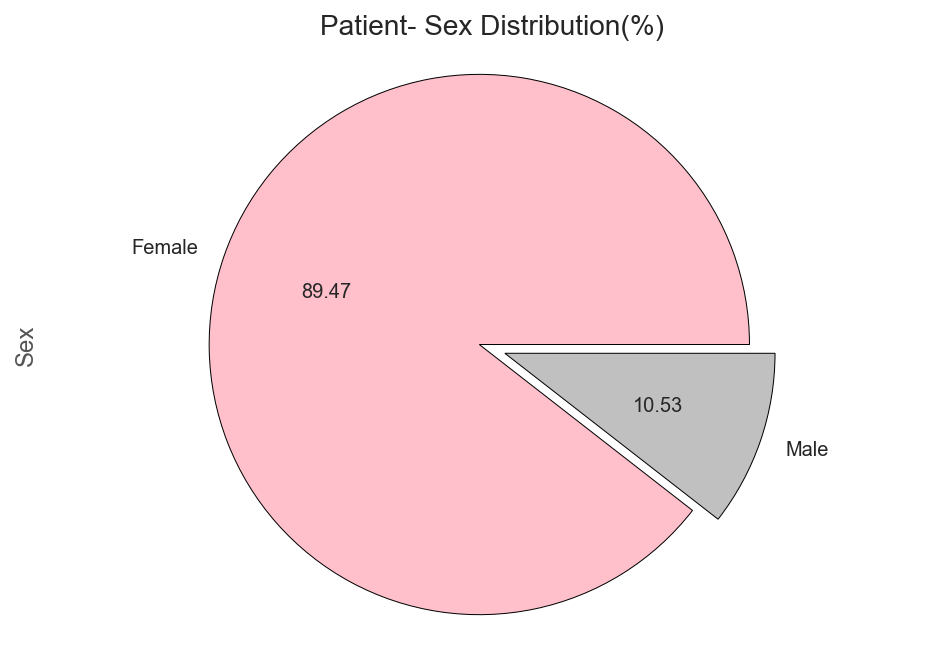

In [29]:
plt.style.use('ggplot')
plt.title("Patient- Sex Distribution")
colors = ['pink', 'silver']
explode = (0.05, 0.05)
labels = ["Female","Male"]
Sex_count.plot(kind='pie',autopct='%.2f',wedgeprops = {"edgecolor":"black"},\
               colors = colors,explode=explode,labels = labels)
plt.title("Patient- Sex Distribution(%)",fontsize=14)
plt.axis('equal')
plt.show()

### Pie Chart for Edema

In [30]:
Edema_count = mask_df['Edema'].value_counts(normalize=True)
Edema_count

N    0.846890
S    0.105263
Y    0.047847
Name: Edema, dtype: float64

By `Pie Chart`, we can see that `84.69%` patient has `No Edema` is present.

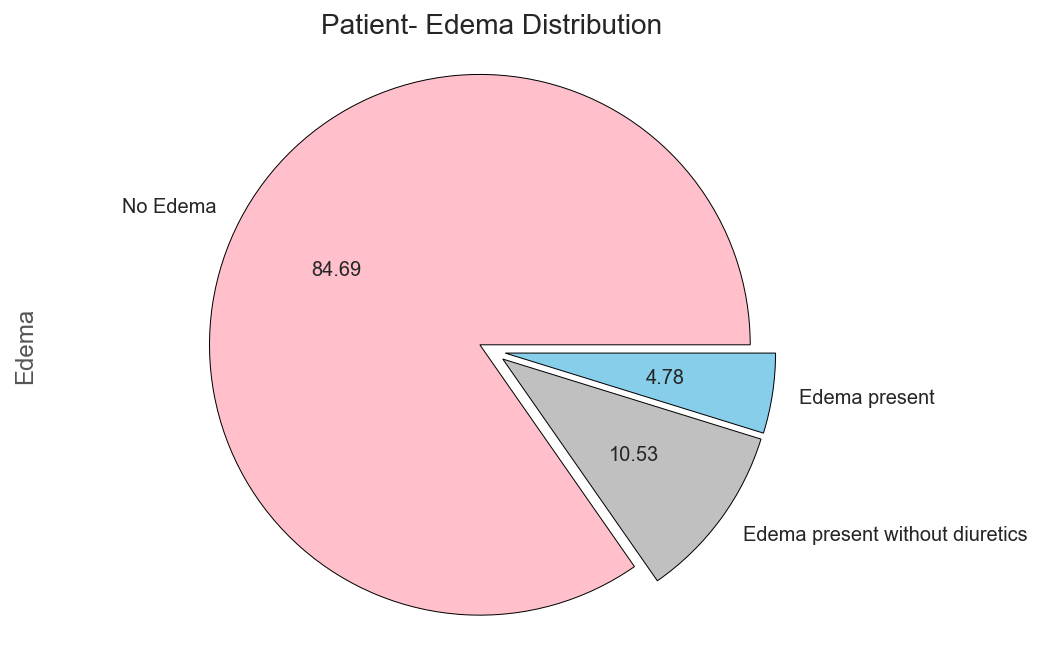

In [31]:
colors = ['pink', 'silver',"skyblue"]
explode = (0.05, 0.05, 0.05)
labels = ["No Edema","Edema present without diuretics", "Edema present"]
Edema_count.plot(kind='pie',autopct='%.2f',wedgeprops = {"edgecolor":"black"},\
               colors = colors,explode=explode,labels = labels)
plt.title("Patient- Edema Distribution",fontsize=14)
plt.axis('equal')
plt.show()

### Histogram for Age Distribution

From this `Histogram` we can say that `most` of the `patient` that affected with this disease has age between `40 to 60` and very less people of age `25 to 30` year old 



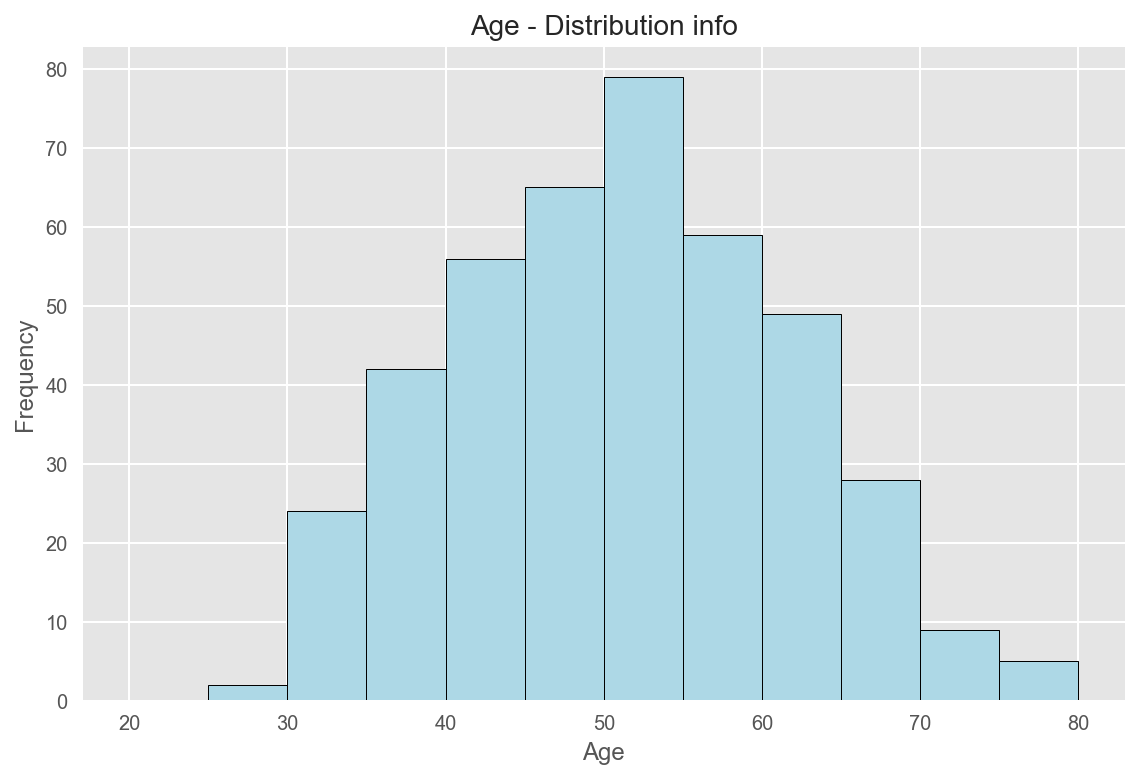

In [32]:
plt.style.use('ggplot')
bins = [20,25,30,35,40,45,50,55,60,65,70,75,80]
mask_df['Age'].plot(kind='hist',bins=bins,edgecolor='black',color = "lightblue") 
plt.title('Age - Distribution info',fontsize=14)
plt.xlabel('Age')
plt.tight_layout()
plt.show()

## Two Variable Visualisation

### Bar graph 

The bar graph is showing the Frequency of `Gender` for different `Cirrhosis liver Stages`. And you can see females dominating male in all stages.

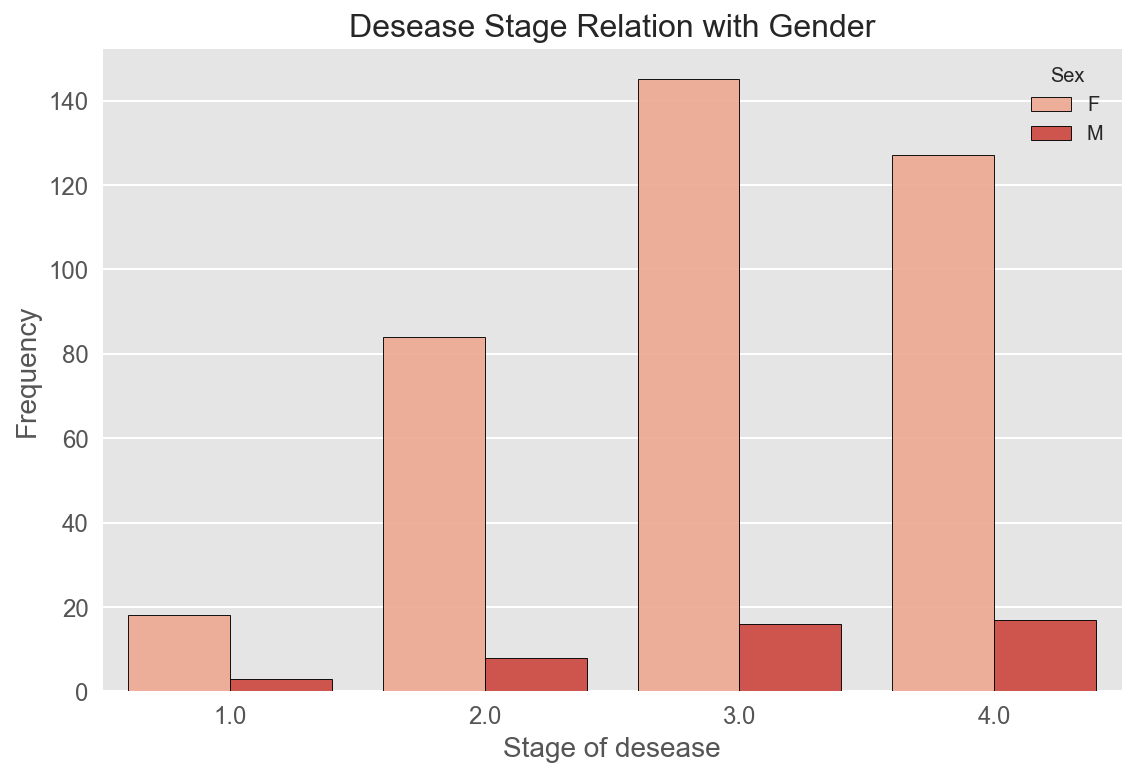

In [33]:
plt.style.use('ggplot')
sns.countplot(x=mask_df['Stage'], hue=mask_df['Sex'], palette='Reds',edgecolor='black', alpha=0.9)
sns.despine(top=True, right=True, bottom=True, left=True)
plt.title('Desease Stage Relation with Gender',fontsize=16)
plt.xlabel("Stage of desease",fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

### Bar Graph 

The `bar graph` is showing the relationship between `Patient - Ascites and Stage of disease`. We can see that Stage 1,2,3 patients have very less ascites as compared to stage 4.

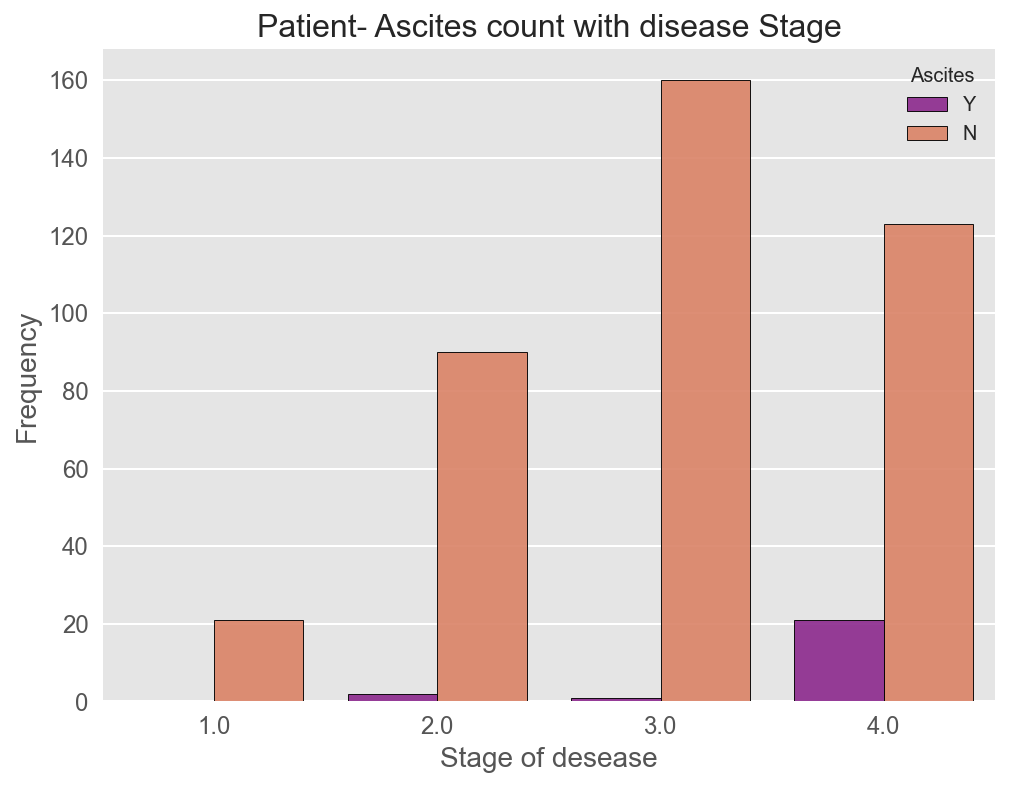

In [34]:
plt.figure(figsize = (8,6))
sns.countplot(x=mask_df['Stage'], hue=mask_df['Ascites'], palette='plasma',edgecolor='black', alpha=0.9)
sns.despine(top=True, right=True, bottom=True, left=True)
plt.title('Patient- Ascites count with disease Stage',fontsize=16)
plt.xlabel("Stage of desease",fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

### Density graph

From this `Density graph`, we can see that the density of Not present of  `Spider`  is very high as compared to presence of Spider

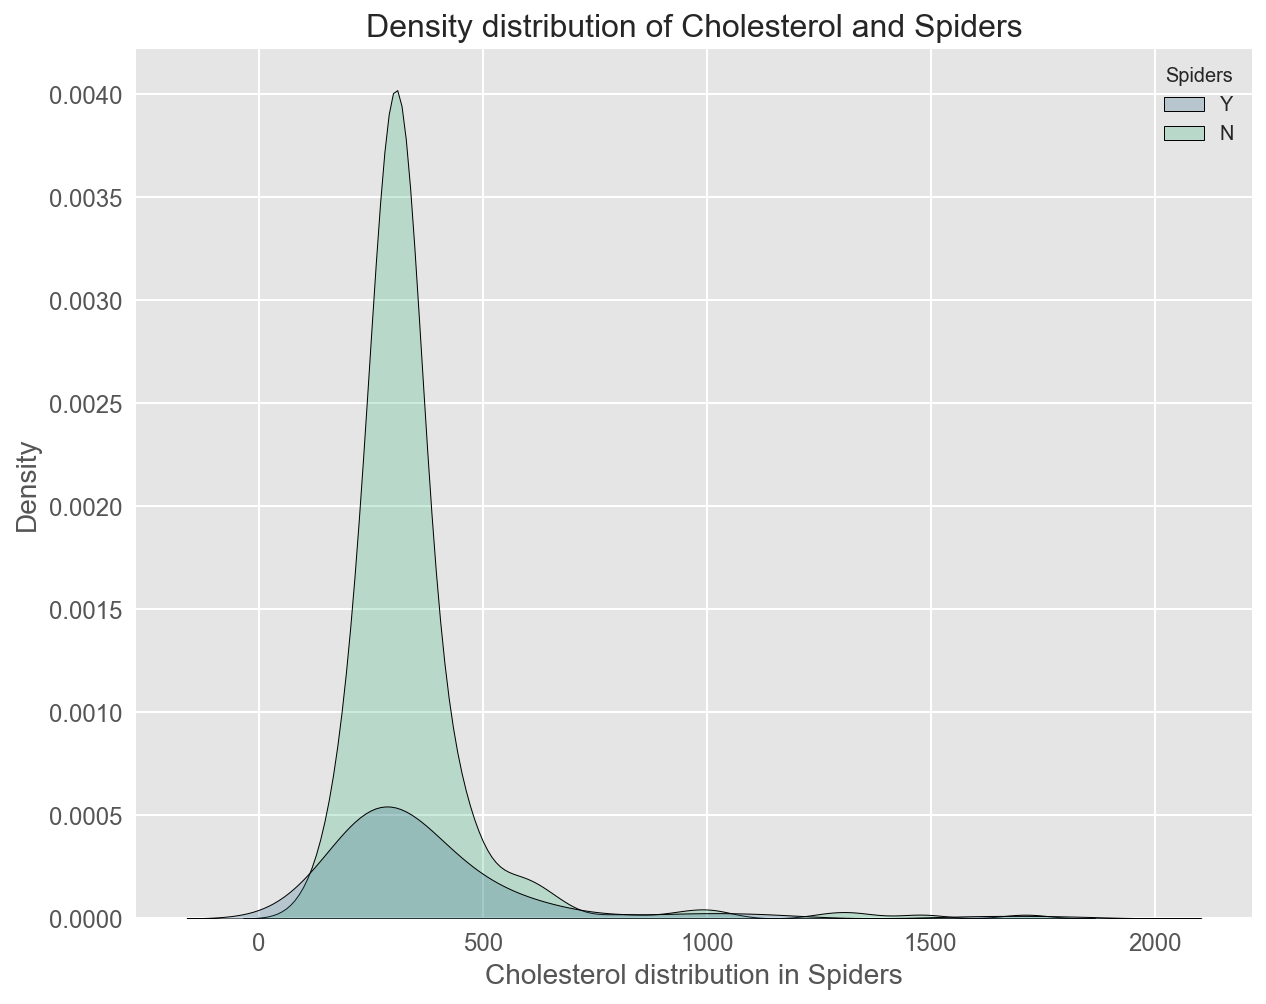

In [35]:
plt.figure(figsize = (10,8))
sns.kdeplot(mask_df['Cholesterol'], hue=mask_df['Spiders'], fill=True,edgecolor='black', palette='viridis')
sns.despine(top=True, right=True, bottom=True, left=True)
plt.title('Density distribution of Cholesterol and Spiders',fontsize=16)
plt.xlabel("Cholesterol distribution in Spiders",fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

## Three Variable Visualisation

## Scatter Plot of Copper by Drag and Age

`Scatter Plot` is showing the `Drugs` by different colour and relationship with `Copper` and `Age` of patient. By seeing the graph, we can say that most of the patient has less then 100 ug/day Copper.  

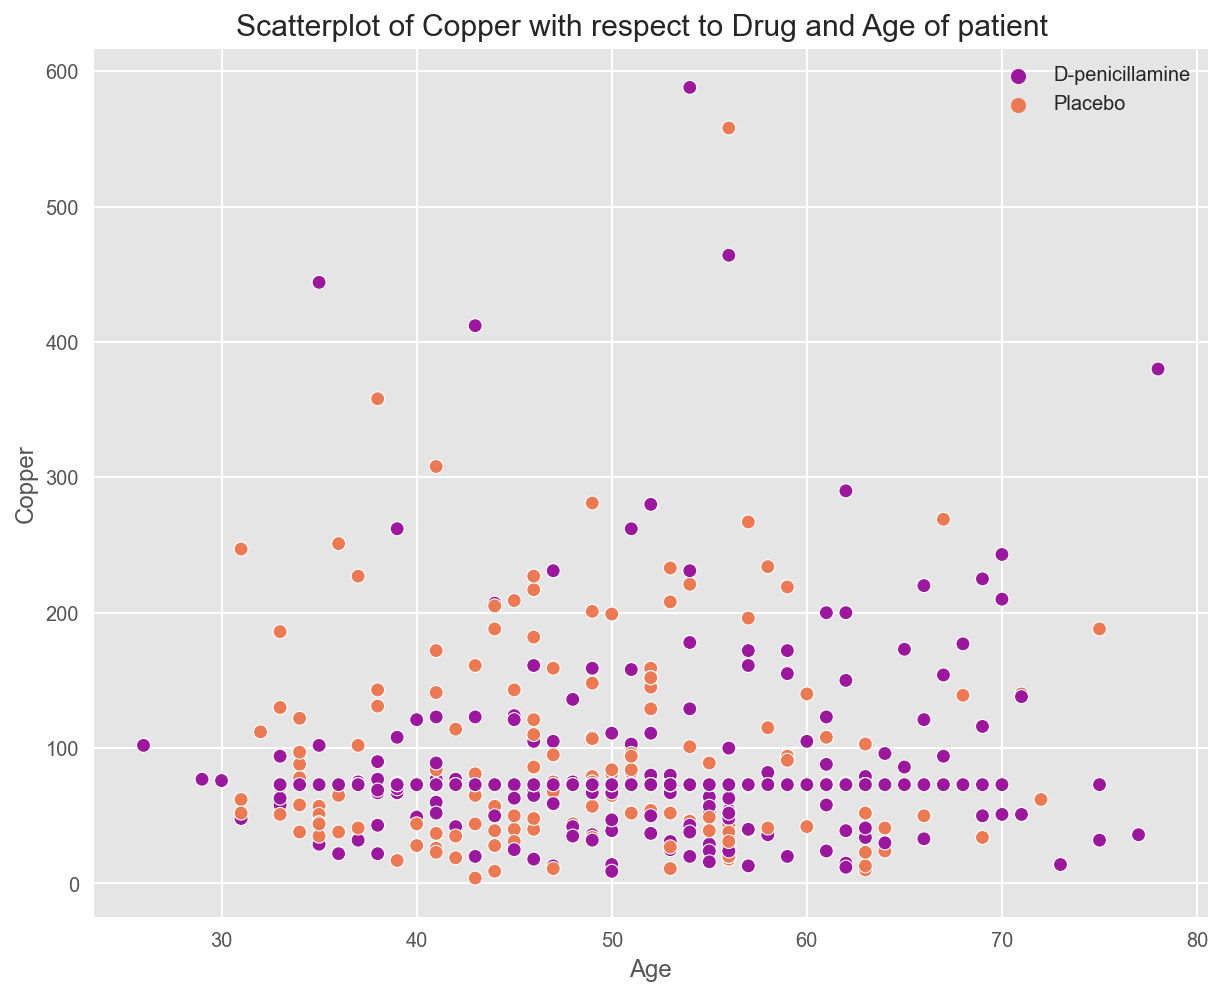

In [36]:
plt.style.use('ggplot')
plt.figure(figsize = (10,8))
sns.scatterplot(mask_df['Age'], mask_df['Copper'], hue = mask_df['Drug'], palette='plasma')
plt.title('Scatterplot of Copper with respect to Drug and Age of patient  ', fontsize = 15);
plt.legend(loc = 'upper right')
plt.show();

## Line Graph 

Comparing the `Drugs` taken by patient relationship with `Albumin` and `Age`. By this line graph we can see that most of the values of `Albumin` is in between `3 gm to 4 gm`.


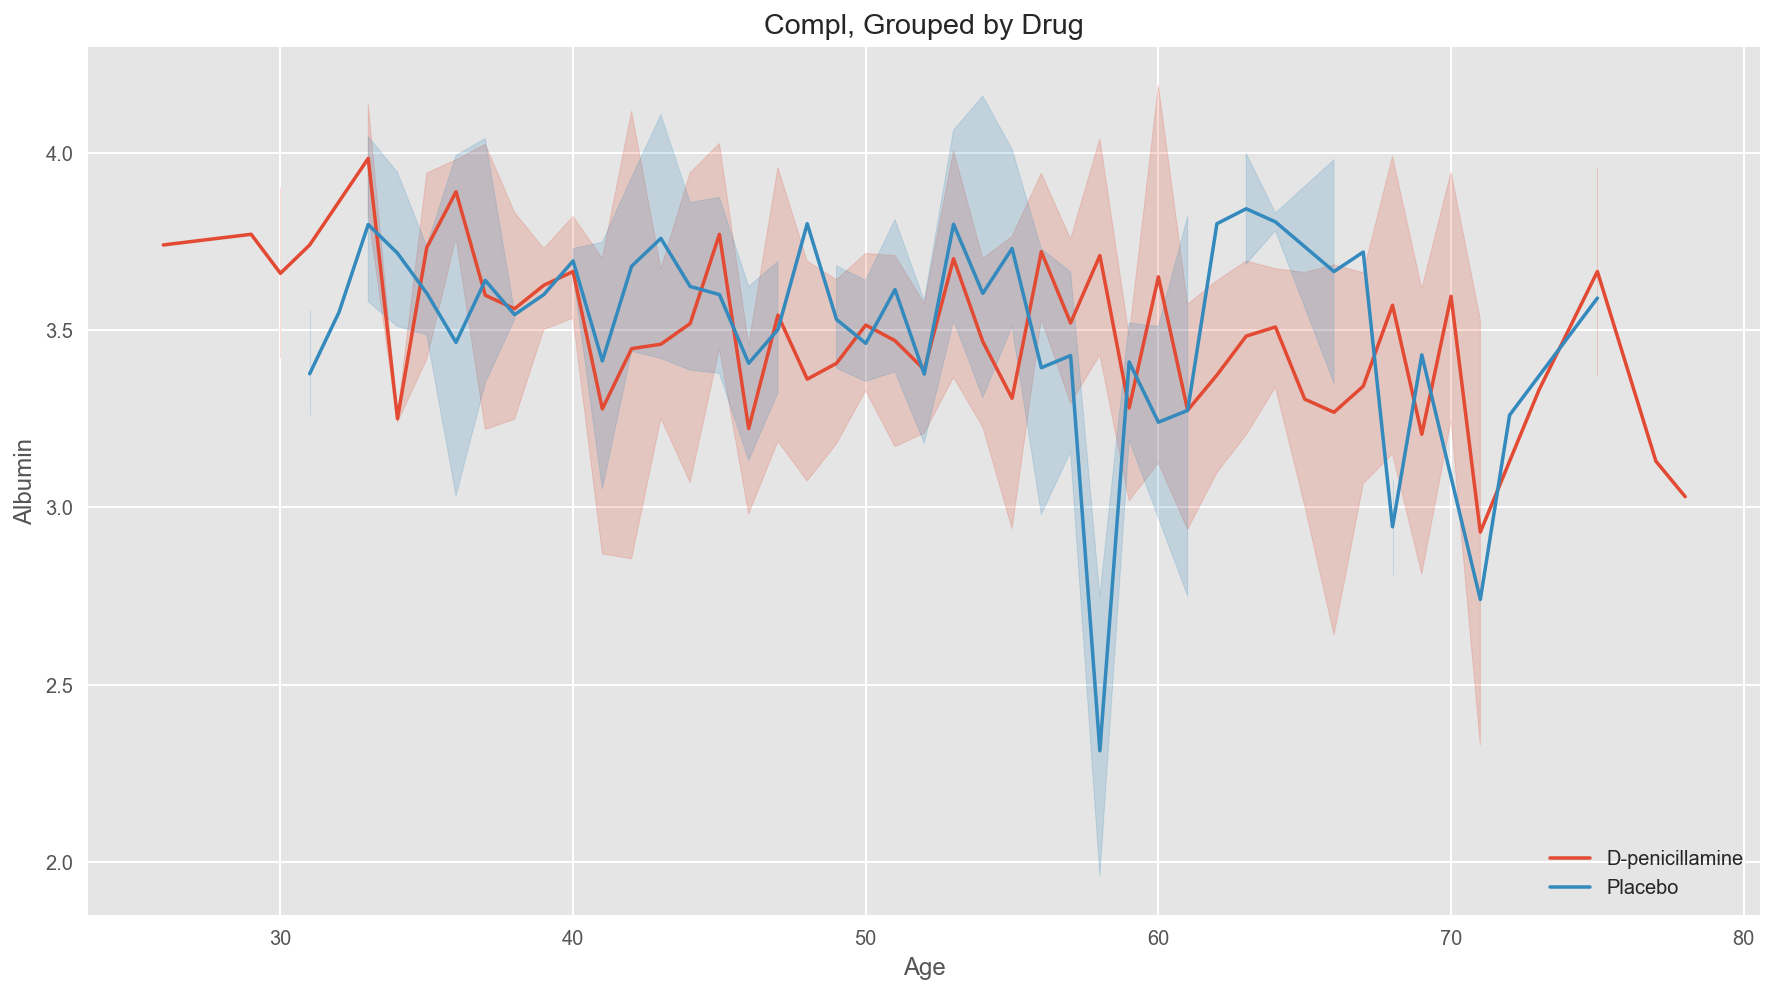

In [37]:
plt.figure(figsize = (15,8))
sns.lineplot(x='Age', y='Albumin', hue='Drug', data=mask_df)
plt.title('Compl, Grouped by Drug')
plt.xlabel('Age')
plt.ylabel('Albumin')
plt.legend(loc = 'lower right')
plt.show()

## Bar Graph

From this `bar graph`, we can see the `Stage of Disease` of the patient with respect to `maximum age` in each Stage and Hepatomegaly presence.

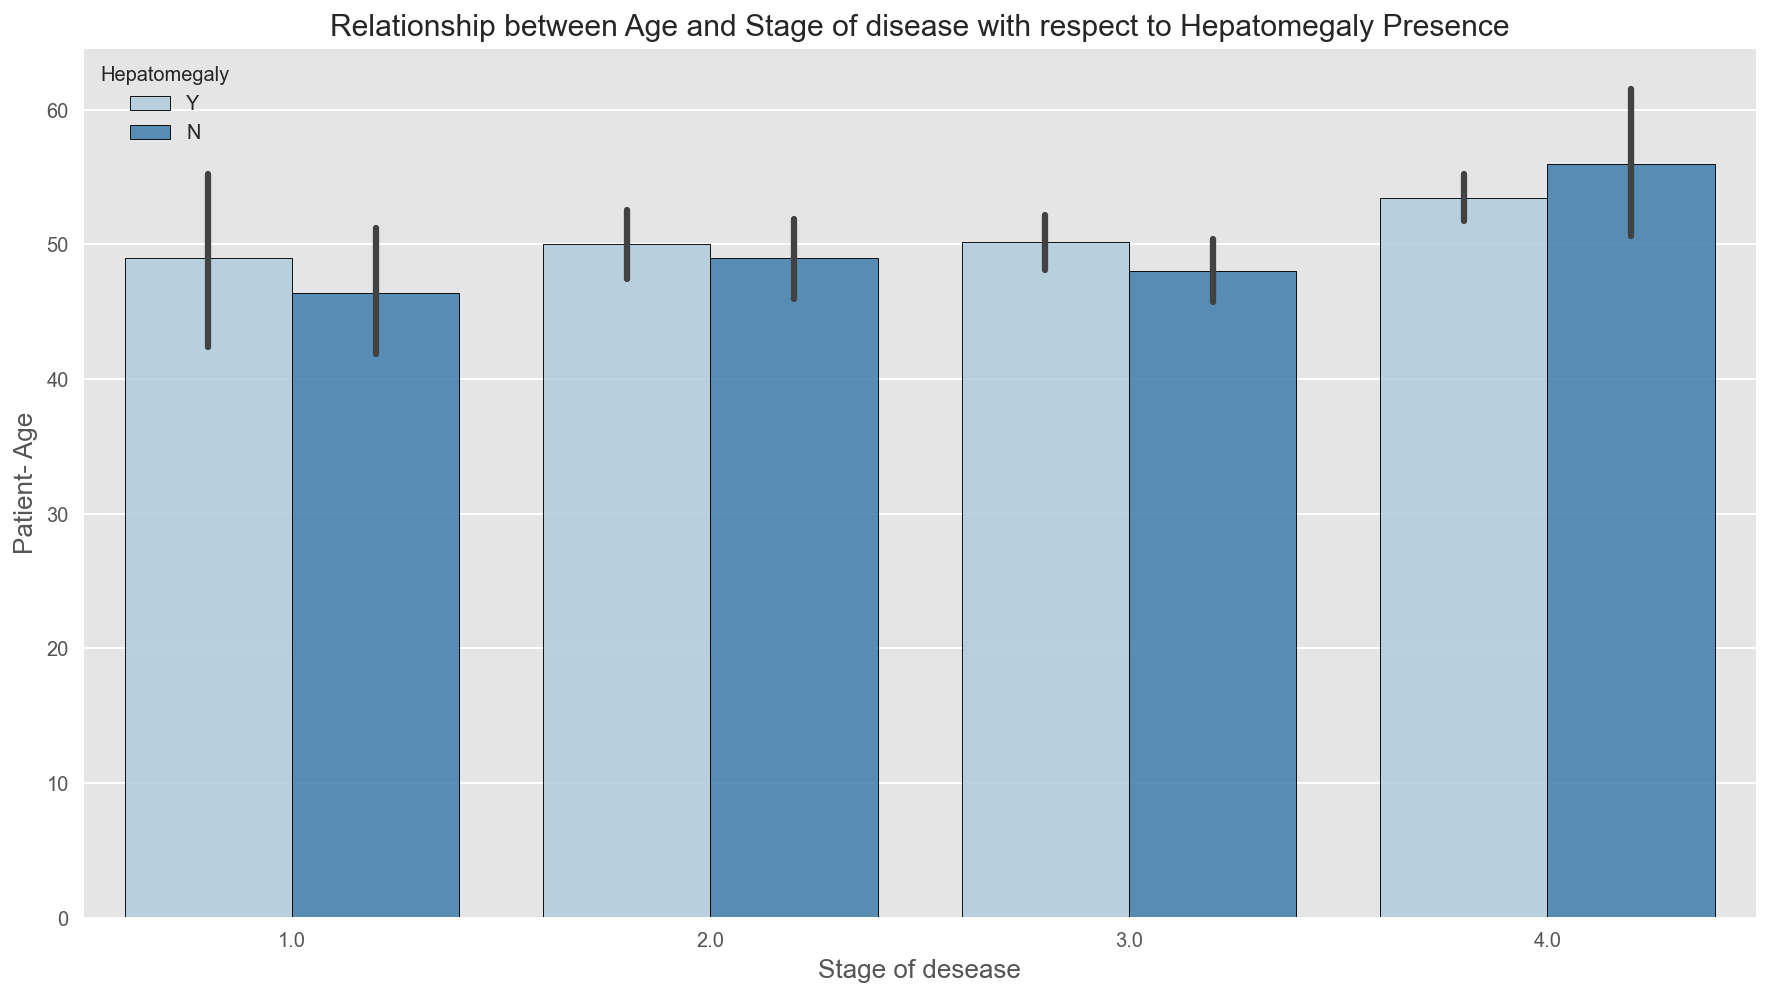

In [38]:
plt.figure(figsize = (15,8))
colors = ['lightblue', "gray"]
fig_4 = sns.barplot(x ='Stage', y ='Age', hue = 'Hepatomegaly',edgecolor='black',\
                    palette='Blues', alpha = 0.9,data = mask_df)
plt.title('Relationship between Age and Stage of disease with respect to Hepatomegaly Presence', fontsize = 15)
plt.xlabel('Stage of desease', fontsize = 13)
plt.ylabel('Patient- Age', fontsize = 13) 
plt.show();

# Literature Review

Cirrhosis is a condition in which the liver is damaged, and the healthy liver cells are replaced by fibrous scar tissue. As a result, the liver cannot perform its essential functions, such as producing proteins, filtering toxins and drugs, and metabolizing substances. It is caused by various factors such as alcohol abuse, viral hepatitis, and non-alcoholic fatty liver disease (NAFLD). Machine learning has shown potential in predicting the progression of cirrhosis and identifying subgroups of cirrhosis patients. 

In 2019, Chein et al. carried out a research study employing machine learning models to predict liver disease, which could aid physicians in identifying high-risk patients and making a novel diagnosis. The study demonstrated that machine learning models could precisely predict the progression of cirrhosis and recognize patients with a high risk of developing liver-related complications. The researchers developed and compared four classification models to accurately predict fatty liver disease, and the results showed that the random forest model outperformed the other models. In 2020, Taylor et al. conducted a study where simple machine learning techniques performed just as well as more advanced ensemble gradient boosting. The research revealed that machine learning could assist in selecting important variables for more transparent risk scores while maintaining high levels of accuracy. The resulting blended CiMM outperformed the widely used MELD-Na score. If validated in other conditions, this blended approach could improve data-driven risk prognostication through the development of new scores that are more transparent and actionable than machine learning and more predictive than traditional risk scores.

In 2015, P. Thangaraju and R. Mehala suggested using the particle swarm optimization algorithm (PSO) in conjunction with K Star classification to analyze liver disease data. This proposed algorithm was found to outperform existing classification algorithms in terms of accuracy for two aspects of disease classification. The PSO-Kstar algorithm was determined to be the most suitable algorithm for classifying liver disorders due to its superior performance in prediction accuracy. Additionally, the algorithm was considered a good data mining algorithm based on its understandability, transformability, and accuracy, achieving 100%.

Dr.S.Vijayarani, Mr.S.Dhayanand et al., (2015) has proposed description of this research work is to predict liver diseases using classification algorithms. The algorithms used in this work are Naïve Bayes and support vector machine (SVM Comparisons of these algorithms are done and it is based on the performance factors classification accuracy and execution time. From the results, this work concludes the SVM classifier is considered as a best classification algorithm because of its highest classification accuracy values.

A proposed method by A.S. AnneshKumar, Dr. C. JothiVenkateswaran, and colleagues (2015) involves the use of feature selection and fuzzy K-means classification to categorize liver disorders. Due to various liver disorders sharing the same attribute values, it requires more effort to accurately classify the type of liver disorder using basic attributes. P.Rajeswari, G.Sophia Reena et al. (2010) proposed a data classification method for liver disorders using a training dataset collected from the UCI repository, which consisted of 345 instances with 7 different attributes. The study evaluated the performance of Naïve Bayes, FT Tree, and KStar algorithms in classifying liver diseases. The results showed that the FT Tree algorithm had a high accuracy of 97.10% and a fast running time compared to the other algorithms tested. The authors concluded that the FT Tree algorithm performed better than other algorithms in classifying liver disorders based on the experimental results.

Sa’diyah Noor Novita Alfisahrin, Teddy Mantoro, and colleagues (2013) presented a method to diagnose liver disease in patients by analyzing 10 significant attributes of liver disease with Decision Tree, Naive Bayes, and NB Tree algorithms. The study found that the NB Tree algorithm provided the highest accuracy, while the Naïve Bayes algorithm was the fastest in computation time. The researchers plan to further improve the accuracy of the NB Tree algorithm by identifying the most crucial factor in diagnosing liver disease patients in future research.

Anju Gulia, Dr. Rajan Vohra, Praveen Rani et al. [2014] proposed a hybrid model to improve the prediction accuracy of liver patients in three phases. In the first phase, classification algorithms were applied to the original liver patient datasets collected from the UCI repository. In the second phase, a subset of liver patient data with only significant attributes was obtained through feature selection, and the selected classification algorithms were applied. SVM algorithm was found to have better performance before applying feature selection due to higher accuracy compared to other classification algorithms. However, Random Forest algorithm showed better performance after applying feature selection. In the third phase, the results of classification algorithms with and without feature selection were compared. 

S.E. Seker, Y. Unal, Z. Erdem, and H. Erdinc Kocer (2014) applied data mining techniques including KNN, SVM, MLP and decision trees on a dataset consisting of 16,380 analysis results collected over a year. This study can be valuable for future research to reduce the number of analyses required since the predictions can be correlated, and this correlation can also be used for anomaly detection in the analysis. In 2014, S. Dhamodharan proposed a method to predict three major liver diseases, including liver cancer, cirrhosis, and hepatitis, based on their distinct symptoms. The aim was to predict the class type of liver disorders, including "no diseases." The study compared the accuracy of the Naïve Bayes and FT tree algorithms, with the result showing that the Naïve Bayes algorithm had higher accuracy than the other algorithms.

Onwodi Gregory [2015] conducted a study on two liver patient datasets to develop classification models for liver diagnosis prediction. The study used eleven data mining classification algorithms and compared their performance based on accuracy, precision, and recall. The results showed that the FT Tree algorithm had the best classification accuracy among all the algorithms tested. The study also found that the algorithm's performance was improved based on the attributes, resulting in 78.0% accuracy, 77.5% precision, 86.4% sensitivity, and 38.2% specificity. Ebenezer Obaloluwa Olaniyi, Khashman Aadnan et al. (2015) have suggested using backpropagation neural network and radial basis function neural network to diagnose liver disorders and prevent misdiagnosis of patients with liver disorders.



Overall, the studies reviewed demonstrate the potential of machine learning in predicting disease progression, identifying patient subgroups, and improving diagnosis and treatment of cirrhosis. However, further studies are needed to validate the accuracy and reliability of these models in clinical practice.


# Summary and Conclusion

Accurately predicting the Stage of a patient by using a `machine learning` algorithm and getting high accuracy is the goal of our `machine learning project`. There are many dependent variables that we can say that are good predictors for prediction like some lab tests report, patient status, drugs taken by patients and many more. With the help of these variables we will predict the `Stage of liver disease`. 

In this `Project phase 1`, we completed the cleaning of the dataset and explored the dataset with the help of statistics. And replace the missing values with median and mode. There is one column `ID` which only defines the ID of a patient so we remove that column. And the age of the patient is in days so we convert the age of the patient in years. We did not remove the missing values because our dataset is small so it is not good to remove the missing values. 

After that we explore the dataset by Checking the unique values and after that create some `visualisation` to understand the dataset easily. By seeing the graph we can say that the age of the patient is between 40 to 60 years old and the female in this clinical trial is around 87%.

By visualisations, we are able to understand the relationship between the `target variable` and other features such as Status, Drug, Sex, Ascites, Hepatomegaly, Spiders, Edema.





# Reference

Cirrhosis Prediction Dataset. (n.d.). Www.kaggle.com. https://www.kaggle.com/datasets/fedesoriano/cirrhosis-prediction-dataset

Wu, C.-C., Yeh, W.-C., Hsu, W.-D., Islam, Md. M., Nguyen, P. A., Poly, T. N., Wang, Y.-C., Yang, H.-C., & Jack) Li, Y.-C. (2019). Prediction of fatty liver disease using machine learning algorithms. Computer Methods and Programs in Biomedicine, 170, 23–29. https://doi.org/10.1016/j.cmpb.2018.12.032

Kanwal, F., Taylor, T. J., Kramer, J. R., Cao, Y., Smith, D., Gifford, A. L., El-Serag, H. B., Naik, A. D., & Asch, S. M. (2020). Development, Validation, and Evaluation of a Simple Machine Learning Model to Predict Cirrhosis Mortality. JAMA Network Open, 3(11), e2023780. https://doi.org/10.1001/jamanetworkopen.2020.23780


P. Thangarajul,R.Mehala, Performance Analysis of PSO-KStar Classifier over Liver Diseases, International Journal of Advanced Research in Computer
Engineering, 2015. https://www.researchgate.net/publication/281148571_Performance_Analysis_of_PSO-KStar_Classifier_over_Liver_Diseases

A. S., D. A., & Venkateswaran, C. J. (2015, March 25). A Novel Approach for Liver Disorder Classification Using Data Mining Techniques. Papers.ssrn.com. https://papers.ssrn.com/sol3/papers.cfm?abstract_id=3509477

‌

Rajeswari, P., & Reena, G. (2010). Analysis of Liver Disorder Using Data mining Algorithm. Global Journal of Computer Science and Technology, 10. https://globaljournals.org/GJCST_Volume10/9-Analysis-of-Liver-Disorder-Using-Datamining-Algorithm.pdf

‌

Sa’sdiyah Noor Novita Alfisahrin,Teddy Mantoro, Data mining Techniques For Optimatization of Liver Disease Classification,International conference on advanced Computer Science Application and Technologies,2013. https://www.researchgate.net/publication/269300253_Data_Mining_Techniques_for_Optimization_of_Liver_Disease_Classification

Gulia, A., Vohra, R. and Rani, P. (2014) Liver Patient Classification Using Intelligent Techniques. (IJCSIT) International Journal of Computer Science and Information Technologies, 5, 5110-5115. - References - Scientific Research Publishing. (n.d.). Www.scirp.org. Retrieved April 9, 2023, from https://www.scirp.org/(S(lz5mqp453edsnp55rrgjct55))/reference/ReferencesPapers.aspx?ReferenceID=1965050

‌

S.E.Sekar ,Y.Unal, Z.Erdem,and H.Erdinc Kocer,Ensembled Correlation Between Liver Analysis Output, International Journal of Biology
and Biomedical ngineering,ISSN:1998-4150 https://www.irjet.net/archives/V5/i1/IRJET-V5I142.pdf

S. Dhamodharan. (2014). Liver Disease Prediction Using Bayesian Classification. https://www.semanticscholar.org/paper/Liver-Disease-Prediction-Using-Bayesian-Dhamodharan/d68d556dcaf412b0770f8d9c1237685b4e7e5d6c

‌

Tapas RanjanBaitharua, Subhendu Kumar Panib, Analysis of Data Mining Techniques For Healthcare Decision Support System Using Liver Disorder Dataset, International Conference on Computational Modeling and Security, 2016. https://www.researchgate.net/publication/303745893_Analysis_of_Data_Mining_Techniques_for_Healthcare_Decision_Support_System_Using_Liver_Disorder_Dataset

Onwodi Gregory, Prediction of Liver Disease (Biliary Cirrhosis) Using Data Mining Technique, International Journal of EmergingTechnology&Research, ISSN(E):2347-5900, ISSN (P):2347-6079, 2015. https://www.irjet.net/archives/V5/i1/IRJET-V5I142.pdf

Ebenezer Obaloluwa Olaniyi khashman Aadnan,Liver DiseaseDiagnosisBasedon Neural Networksǳ ,Advances in Computational Intelligence, Proceedings of
the 16th International Conference on Neural Networks. https://www.researchgate.net/publication/318468361_Liver_Disease_Diagnosis_Based_on_Neural_Networks